# A Model to predict whether a customer will open a Term Deposit or not.

## Model used: MLPClassifier

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("bank-full.csv",delimiter=';')

In [2]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
df.shape

(45211, 17)

In [4]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# DATA CLEANING

In [6]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no

In [7]:
obj_df[obj_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [job, marital, education, default, housing, loan, contact, month, poutcome, y]
Index: []

In [8]:
print(obj_df["job"].value_counts())
print('\n')
print(obj_df["marital"].value_counts())
print('\n')
print(obj_df["education"].value_counts())
print('\n')
print(obj_df["default"].value_counts())
print('\n')
print(obj_df["housing"].value_counts())
print('\n')
print(obj_df["loan"].value_counts())
print('\n')
print(obj_df["contact"].value_counts())
print('\n')
print(obj_df["month"].value_counts())
print('\n')
print(obj_df["poutcome"].value_counts())
print('\n')
print(obj_df["y"].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


no     44396
yes      815
Name: default, dtype: int64


yes    25130
no     20081
Name: housing, dtype: int64


no     37967
yes     7244
Name: loan, dtype: int64


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In [9]:
cleanup_nums = {"job":     {"blue-collar":0, "management":1, "technician":2, "admin.":3, "services":4, "retired":5, "self-employed":6, "entrepreneur":7, "unemployed":8, "housemaid":9, "student":10, "unknown":11},
                "marital": {"married":1, "single":0, "divorced":2},
                "education": {"secondary":1, "tertiary":2, "primary":0, "unknown":3},
                "default": {"no":0, "yes":1},
                "housing": {"yes":1,"no":0},
                "loan": {"no":0,"yes":1},
                "contact": {"cellular":0,"unknown":2,"telephone":3},
                "month": {"may":5,"jul":7,"aug":8,"jun":6,"nov":11,"apr":4,"feb":2,"jan":1,"oct":10,"sep":9,"mar":3,"dec":12},
                "poutcome": {"unknown":3 ,"failure":0,"other":2,"success":1},
                "y": {"no":0, "yes":1}
                }

In [10]:
df = df.replace(cleanup_nums)
df.head(3)

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    1        1          2        0     2143        1     0        2   
1   44    2        0          1        0       29        1     0        2   
2   33    7        1          1        0        2        1     1        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      5       261         1     -1         0         3  0  
1    5      5       151         1     -1         0         3  0  
2    5      5        76         1     -1         0         3  0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


# DATA VISUALIZATION

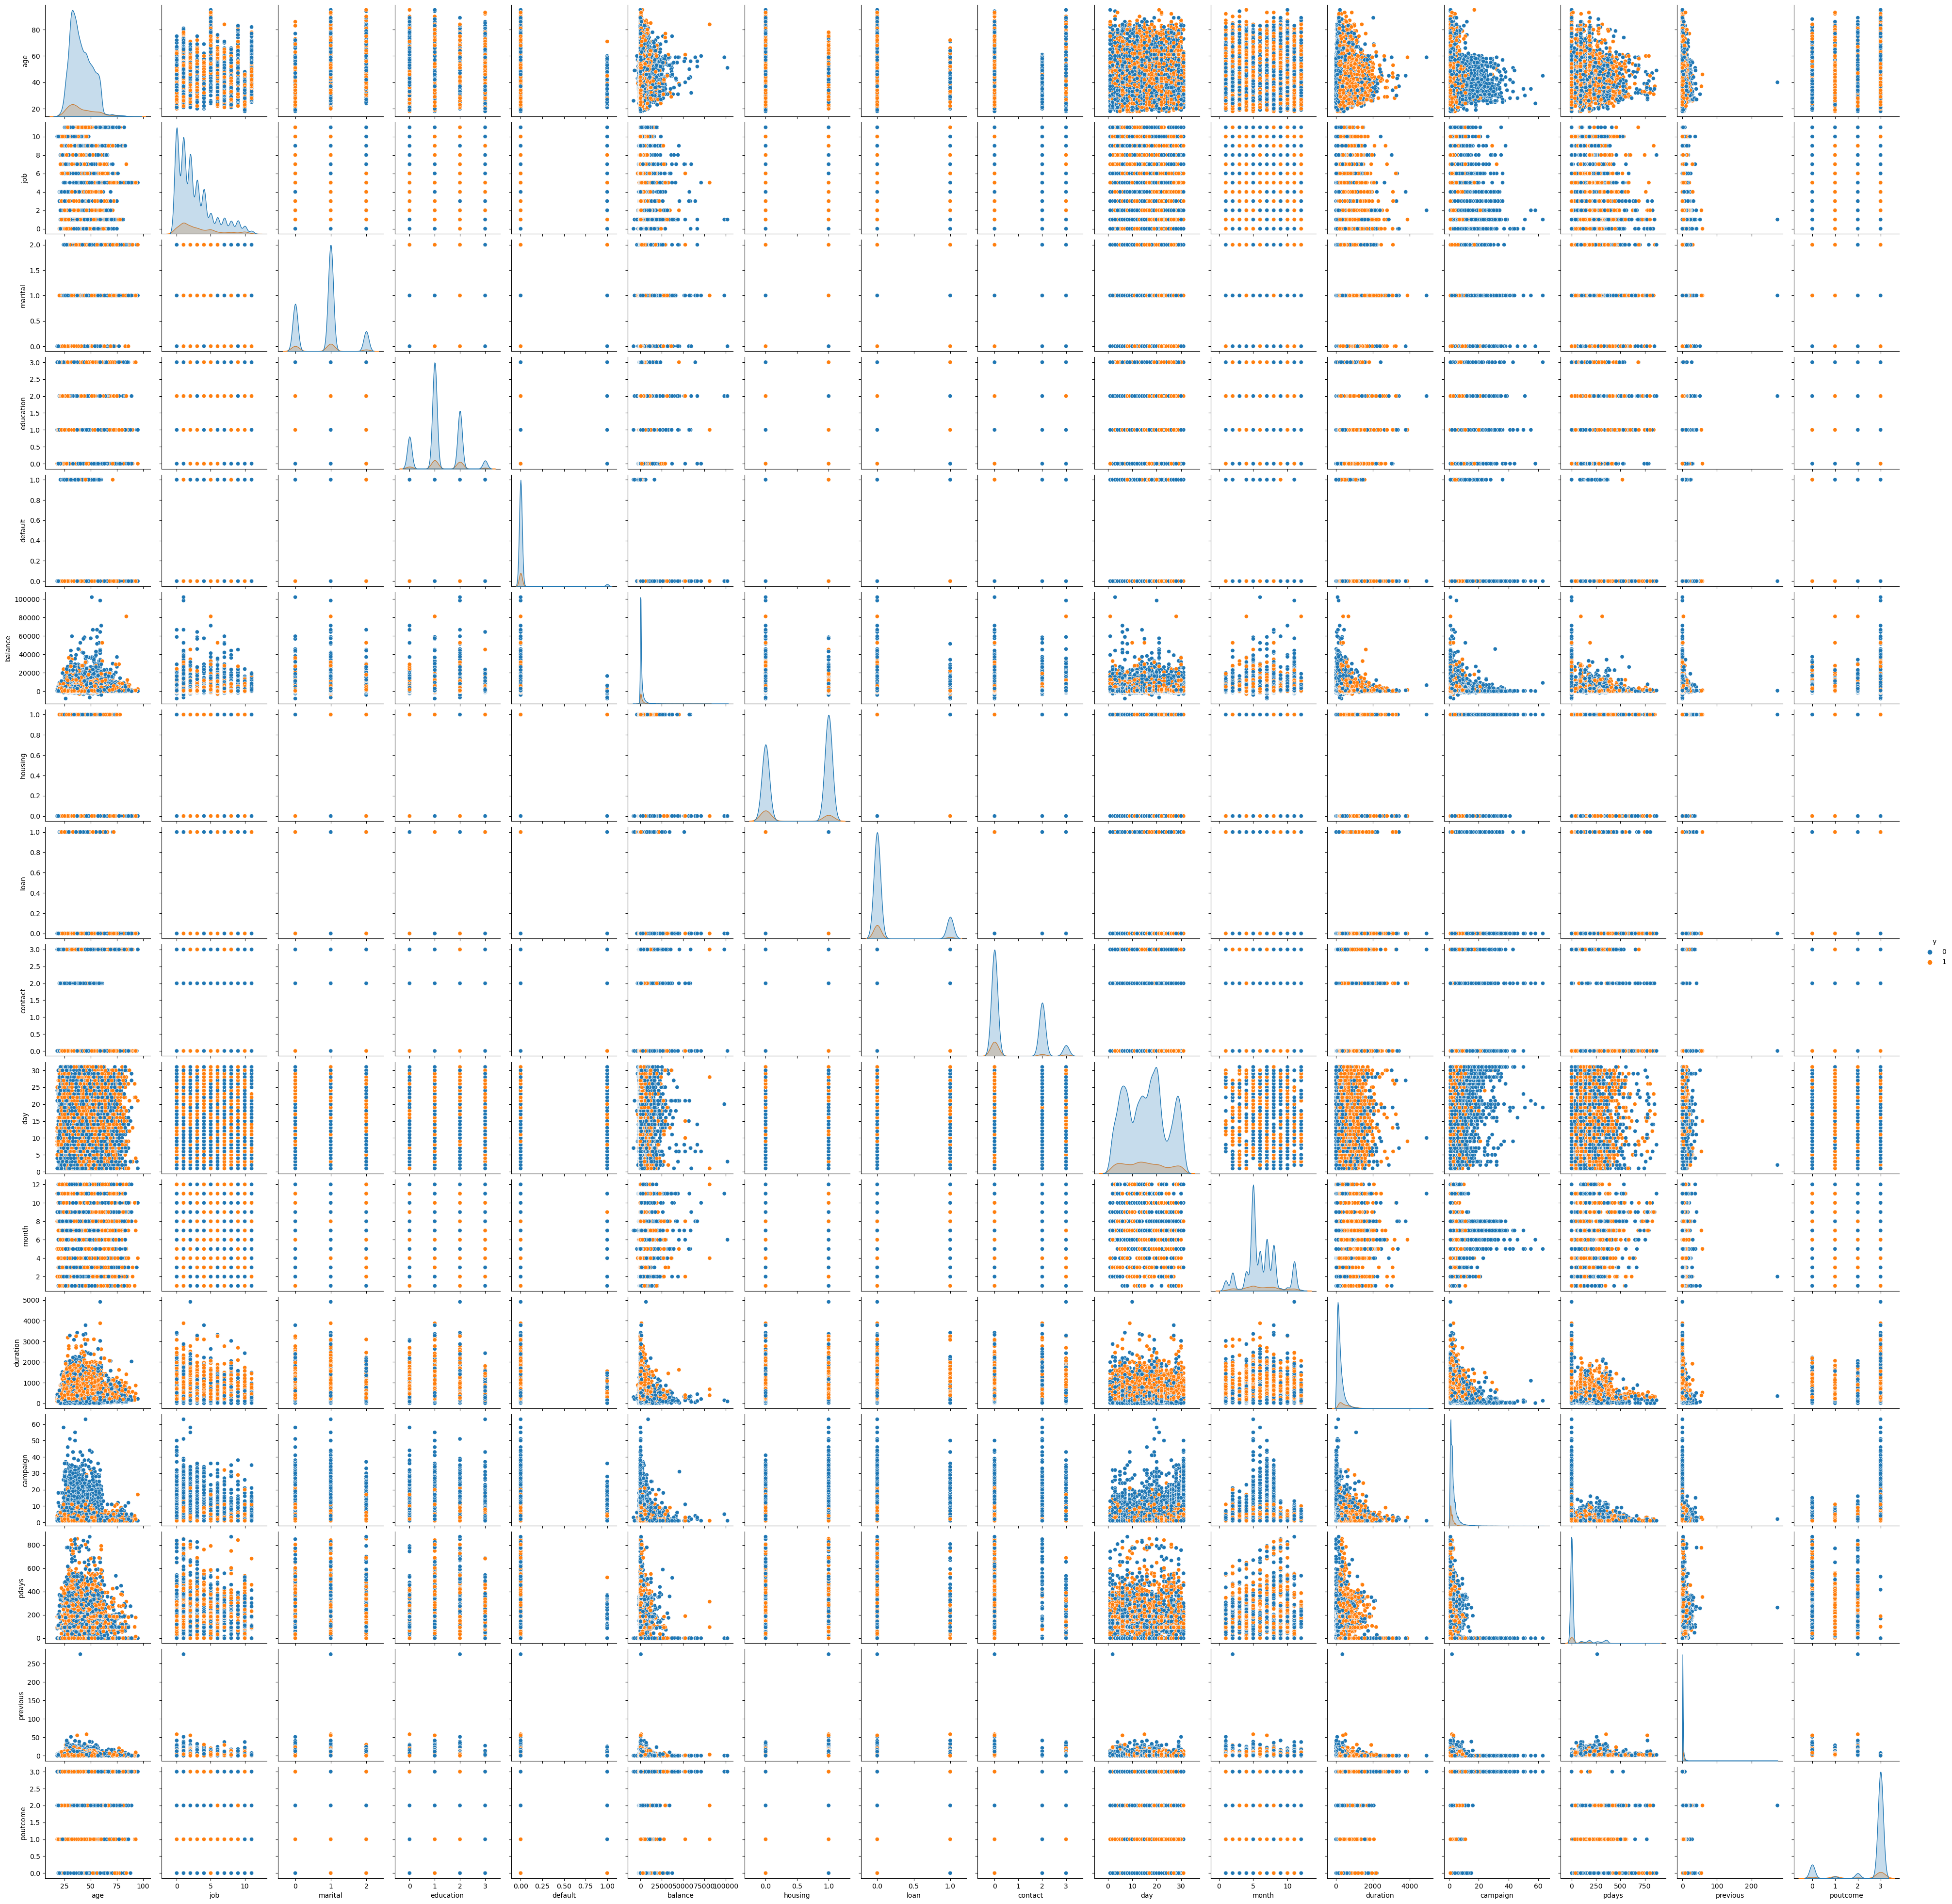

In [13]:
sns.pairplot(df, hue='y')

# Model Building

In [12]:
X= df.iloc[:,0:16]
y= df.iloc[:,16]

In [13]:
X.head(2)

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    1        1          2        0     2143        1     0        2   
1   44    2        0          1        0       29        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0    5      5       261         1     -1         0         3  
1    5      5       151         1     -1         0         3

In [14]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print('X_train Size',X_train.shape)
print('X_test Size',X_test.shape)
print('y_train Size',y_train.shape)
print('y_test Size',y_test.shape)

X_train Size (36168, 16)
X_test Size (9043, 16)
y_train Size (36168,)
y_test Size (9043,)


In [39]:
from sklearn.neural_network import MLPClassifier
model1 = MLPClassifier()
model1.fit(X_train,y_train)

MLPClassifier()

In [40]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = model1.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.8778060378193078


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7975
           1       0.46      0.22      0.29      1068

    accuracy                           0.88      9043
   macro avg       0.68      0.59      0.61      9043
weighted avg       0.85      0.88      0.86      9043



## Hyperparameter Tuning Using Grid Search

In [19]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [20]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

/Users/sridhar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sridhar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sridhar/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/sridhar/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 448, in _fi

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40),
                                                (100, 50, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 150],
                         'solver': ['sgd', 'adam']})

In [21]:
print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'adam'}


# Model by applying best parameters

In [70]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation = 'relu', alpha =  0.0001, hidden_layer_sizes = (120, 80, 40), learning_rate = 'adaptive', max_iter = 150, solver = 'adam')
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(120, 80, 40), learning_rate='adaptive',
              max_iter=150)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.8917394669910428


In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7975
           1       0.57      0.32      0.41      1068

    accuracy                           0.89      9043
   macro avg       0.74      0.64      0.68      9043
weighted avg       0.87      0.89      0.88      9043



### As we can see in the below graph the loss after hyperparameter tuning has very much reduced as well the accuracy for the model is also increased from 87% to 89%

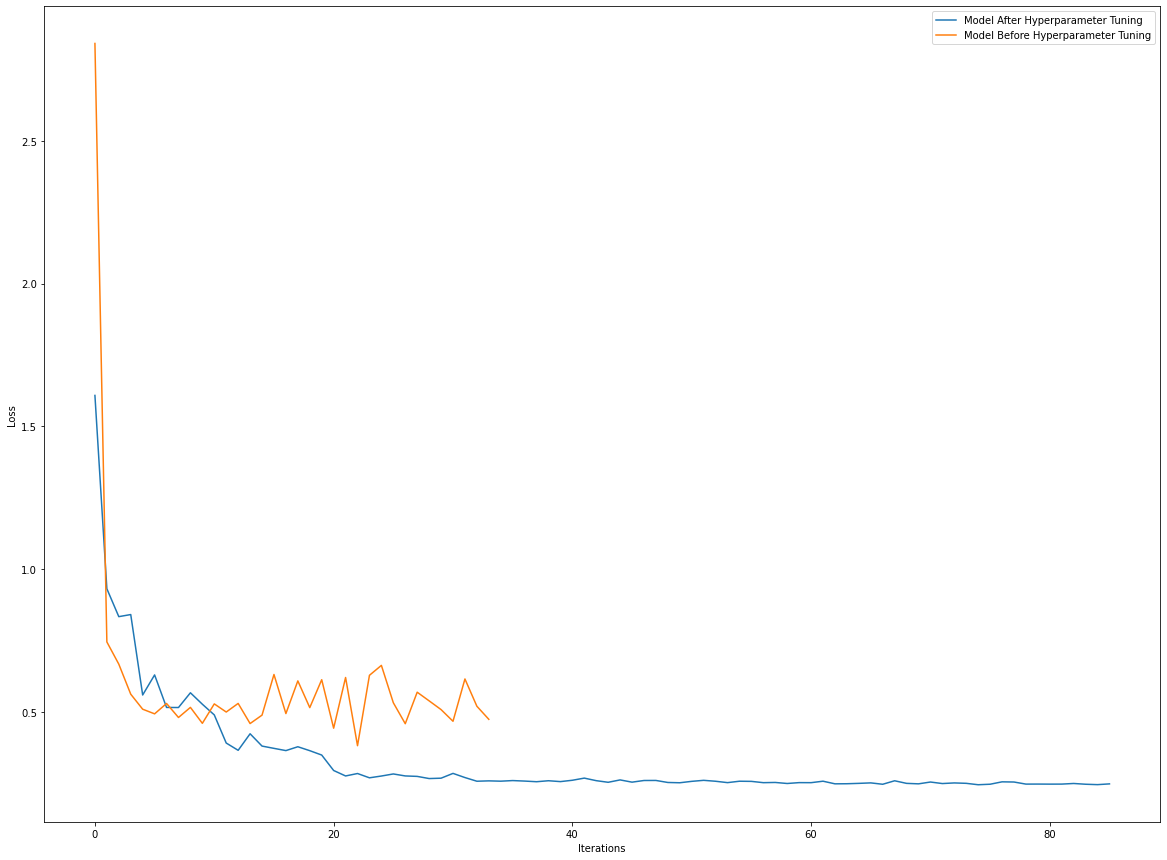

In [73]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
line1, = plt.plot(model.loss_curve_, label='Model After Hyperparameter Tuning')
line2, = plt.plot(model1.loss_curve_, label='Model Before Hyperparameter Tuning')
plt.legend(handles=[line1, line2])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### As we can see below that after hyperparameter tuning the Difference between the Validation Loss and Training Loss has also decreased, hence showing us that there is less overfitting.

In [80]:
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.3)
model.fit(X_train,y_train)
a = model.best_loss_
print("Training loss: ",a)
model.fit(X_val,y_val)
b = model.best_loss_
print("Validation loss: ",b)
print("Loss_Difference:", max(a,b)-min(a,b))

/Users/sridhar/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Training loss:  0.2233458480011601
Validation loss:  0.2697450128376829
Loss_Difference: 0.04639916483652276


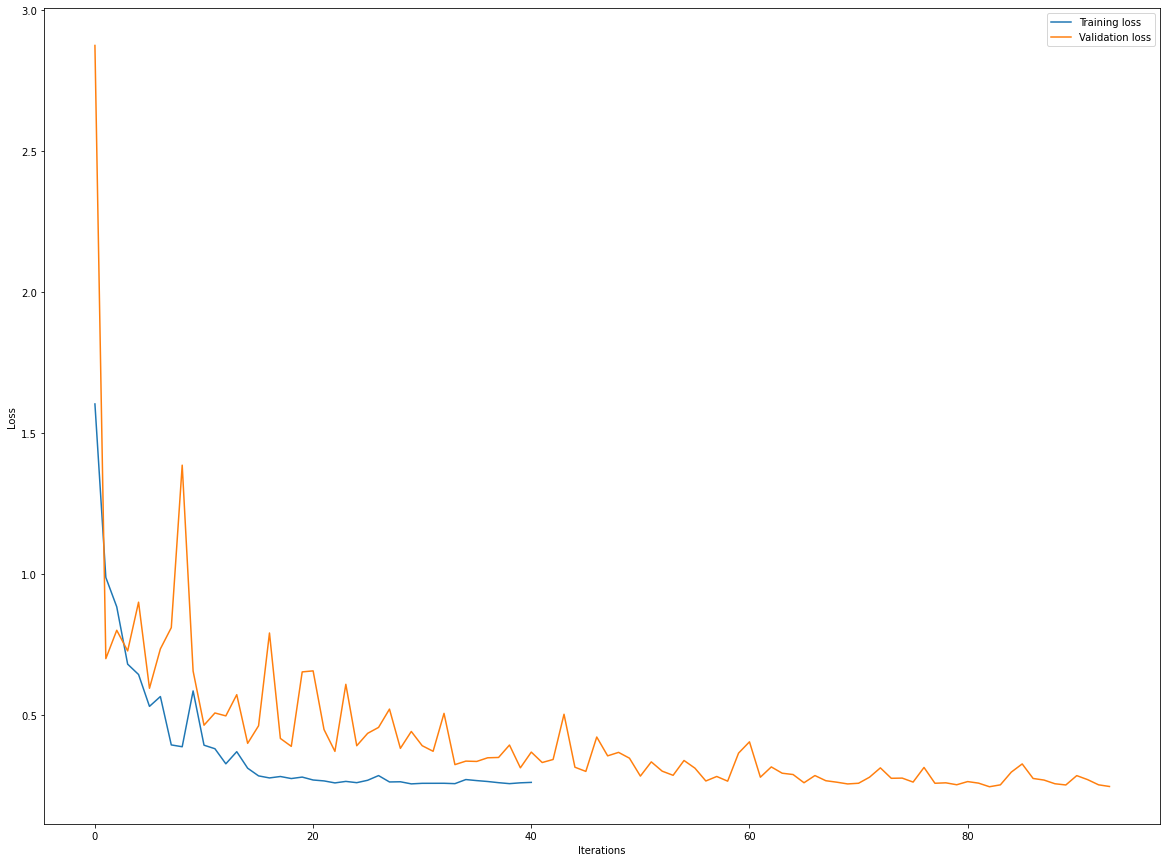

In [79]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
model.fit(X_train,y_train)
line1, = plt.plot(model.loss_curve_, label='Training loss')
model.fit(X_val,y_val)
line2, = plt.plot(model.loss_curve_, label='Validation loss')
plt.legend(handles=[line1, line2])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()